<a href="https://colab.research.google.com/github/SunnyWangW/Colab/blob/main/Crawler_for_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#import package
from dateutil import rrule #rrule for difference between two datetime
# import urllib.request #get website data from URLs
from urllib.request import urlopen
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import json
import time
# import ssl
from datetime import date,timedelta




In [8]:
stocknumber="2317"
start_time = "2023-01-01"
%matplotlib inline

In [18]:
def craw_one_month(stock_number,date):
    url = (
        "http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+
        date.strftime('%Y%m%d')+
        "&stockNo="+
        str(stock_number)
    )
    data = json.loads(urlopen(url).read())
    return pd.DataFrame(data['data'],columns=data['fields'])


In [32]:
# start_time.split('-')
# for x in start_time.split('-'):
#  print(x)
def craw_stock(stock_number, start_month):
    b_month = date(*[int(x) for x in start_month.split('-')])
    return(b_month)
craw_stock(2317,"2023-04-01")

datetime.date(2023, 4, 1)

In [24]:
def craw_stock(stock_number, start_month):
    b_month = date(*[int(x) for x in start_month.split('-')]) #datetime.date(2023, 4, 1)
    #https://stackoverflow.com/questions/12602413/difference-between-int-x-and-int-x
    now = datetime.datetime.now().strftime("%Y-%m-%d")         # 取得現在時間
    e_month = date(*[int(x) for x in now.split('-')])

    result = pd.DataFrame()
    for dt in rrule.rrule(rrule.MONTHLY, dtstart=b_month, until=e_month):
        result = pd.concat([result,craw_one_month(stock_number,dt)],ignore_index=True)
        time.sleep(2000.0/1000.0);

    return result

df = craw_stock(2317,"2023-04-01")
df.set_index("日期", inplace=True)

In [26]:
df.head()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,
112/04/06,"39,285,783","4,091,954,496",104.50,105.50,103.00,103.50,-0.50,"16,621"
112/04/07,"11,913,773","1,231,720,055",104.00,104.00,103.00,103.00,-0.50,"7,332"
112/04/10,"12,576,290","1,298,176,099",103.00,104.00,103.00,103.00,0.00,"8,531"
112/04/11,"29,392,861","3,036,301,674",103.50,104.00,103.00,103.50,+0.50,"12,528"
112/04/12,"20,658,342","2,125,490,764",103.50,103.50,102.50,102.50,-1.00,"14,522"


In [ ]:
# https://ithelp.ithome.com.tw/articles/10206894 for K line

Text(0, 0.5, 'stock')

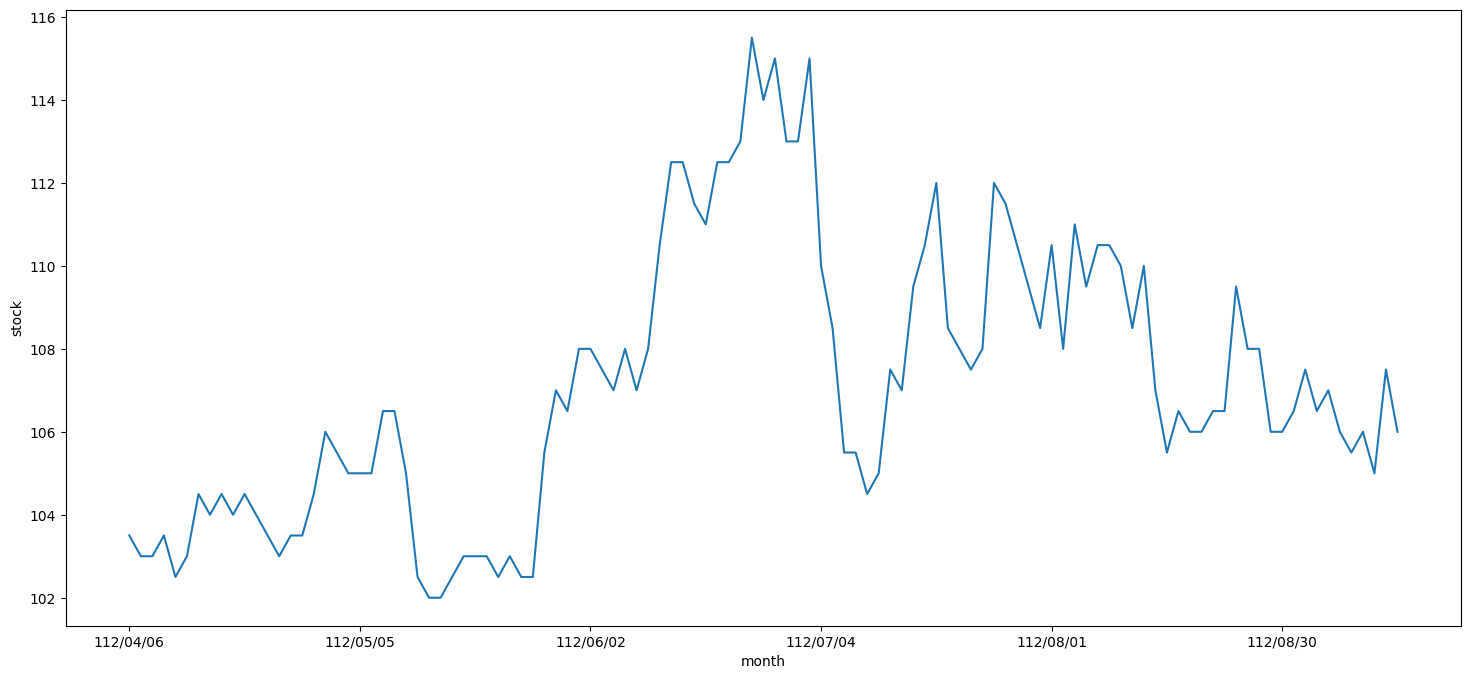

In [36]:
df['收盤價']=df['收盤價'].astype(float)
df.loc[:]['收盤價'].plot(figsize=(18, 8))
plt.xlabel('month')
plt.ylabel('stock')